Exercise 2.2: Monte Carlo simulation of DLA

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [160]:
N = 100

In [161]:
def find_candidates(grid):
    candidates = []
    for i in range(N):
        for j in range(N):
            if grid[i, j] == 1: 
                if i + 1 < N and grid[i + 1, j] == 0 and (i + 1, j) not in candidates:
                    candidates.append((i + 1, j))
                if i - 1 >= 0 and grid[i - 1, j] == 0 and (i - 1, j) not in candidates:
                    candidates.append((i - 1, j))
                if j + 1 < N and grid[i, (j + 1)%N] == 0 and (i, j + 1) not in candidates: 
                    candidates.append((i, j + 1))
                if j - 1 >= 0 and grid[i, (j - 1)%N] == 0 and (i, j - 1) not in candidates:
                    candidates.append((i, j - 1))
    return candidates


In [217]:
x_pos = [np.random.randint(0,N)]
y_pos = [0]

MC_DLA_grid = np.zeros((N,N))
MC_DLA_grid[N-1,50] = 1 #even zorgen dat dit overeenkomt met de vorige opgave
candidates = find_candidates(MC_DLA_grid)
t=0
while t<600: #Fixen dat deze loop stopt als er bijv 150 hokjes geel zijn, het huidige is arbitrair 12100000
    
    if (y_pos[-1],x_pos[-1]) in candidates:
        MC_DLA_grid[y_pos[-1],x_pos[-1]] = 1
        t += 1
        candidates = find_candidates(MC_DLA_grid)
        x_pos.append(np.random.randint(0,N))
        y_pos.append(0)
    
    else:
        step = np.random.randint(0,4)

        if step == 0 and y_pos[-1] != 0:
            x_pos.append(x_pos[-1])
            y_pos.append((y_pos[-1]-1))
        elif step == 0 and y_pos[-1] == 0:
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        elif step == 1 and y_pos[-1] != (N-1):
            x_pos.append(x_pos[-1])
            y_pos.append((y_pos[-1]+1))
        elif step == 1 and y_pos[-1] == (N-1):
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        elif step == 2 and x_pos[-1] != (N-1):
            x_pos.append((x_pos[-1]+1))
            y_pos.append(y_pos[-1])
        elif step == 2 and x_pos[-1] == (N-1):
            x_pos.append(0)
            y_pos.append(y_pos[-1])
        elif step == 3 and x_pos[-1] != 0: 
            x_pos.append((x_pos[-1]-1))
            y_pos.append(y_pos[-1])
        else:
            x_pos.append((N-1))
            y_pos.append(y_pos[-1])



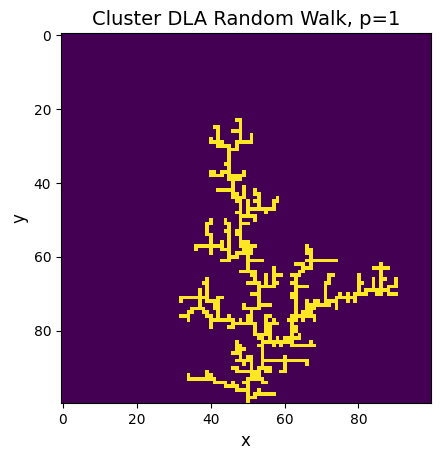

In [218]:
plt.imshow(MC_DLA_grid)
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Cluster DLA Random Walk, p=1',size=14)
plt.show()

======================================================================================================================================

Monte Carlo simulation where the walker does not necessarily stick:

In [225]:
#get ready for some of the least efficient code you have ever seen ;)

x_pos = [np.random.randint(0,N)]
y_pos = [0]


p_stick = 0.125 #change to whichever value we desire

MC_DLA_grid = np.zeros((N,N))
MC_DLA_grid[N-1,50] = 1 #even zorgen dat dit overeenkomt met de vorige opgave
candidates = find_candidates(MC_DLA_grid)
t=0
while t<600: #zelfde comment als bovenstaand
    if (y_pos[-1],x_pos[-1]) in candidates:
        stickyy = np.random.uniform(0,1)
        if stickyy < p_stick:
            MC_DLA_grid[y_pos[-1],x_pos[-1]] = 1
            t += 1
            candidates = find_candidates(MC_DLA_grid)
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        else:
            kans = []
            if ((y_pos[-1] != 0) and MC_DLA_grid[(y_pos[-1]-1),x_pos[-1]] == 0) or (y_pos[-1] == 0):
                kans.append(1)
            if ((y_pos[-1] != (N-1)) and MC_DLA_grid[(y_pos[-1]+1),x_pos[-1]] == 0) or (y_pos[-1] == (N-1)): #this should also work if we are in the bottom of the domain
                kans.append(2)
            if (MC_DLA_grid[y_pos[-1],(x_pos[-1]-1)%N] == 0):
                kans.append(3)
            if (MC_DLA_grid[y_pos[-1],(x_pos[-1]+1)%N] == 0):
                kans.append(4)
            
            if len(kans) == 0: #this statement should not be necessary
                x_pos.append(np.random.randint(0,N))
                y_pos.append(0)
            else:
                VVV = np.random.choice(kans)

                if (VVV == 1):
                    if (y_pos[-1] != 0):
                        x_pos.append(x_pos[-1])
                        y_pos.append((y_pos[-1]-1))
                    else:
                        x_pos.append(np.random.randint(0,N))
                        y_pos.append(0)
                if (VVV == 2):
                    if (y_pos[-1] != (N-1)):
                        x_pos.append(x_pos[-1])
                        y_pos.append((y_pos[-1]+1))
                    else:
                        x_pos.append(np.random.randint(0,N))
                        y_pos.append(0) 
                if VVV == 3 and x_pos[-1] != (N-1):
                    x_pos.append((x_pos[-1]+1))
                    y_pos.append(y_pos[-1])
                if VVV == 3 and x_pos[-1] == (N-1):
                    x_pos.append(0)
                    y_pos.append(y_pos[-1])
                if VVV == 4 and x_pos[-1] != 0: 
                    x_pos.append((x_pos[-1]-1))
                    y_pos.append(y_pos[-1])
                if VVV == 4 and x_pos[-1] == 0:
                    x_pos.append((N-1))
                    y_pos.append(y_pos[-1])
    
    else:
        step = np.random.randint(0,4)

        if step == 0 and y_pos[-1] != 0:
            x_pos.append(x_pos[-1])
            y_pos.append((y_pos[-1]-1))
        elif step == 0 and y_pos[-1] == 0:
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        elif step == 1 and y_pos[-1] != (N-1):
            x_pos.append(x_pos[-1])
            y_pos.append((y_pos[-1]+1))
        elif step == 1 and y_pos[-1] == (N-1):
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        elif step == 2 and x_pos[-1] != (N-1):
            x_pos.append((x_pos[-1]+1))
            y_pos.append(y_pos[-1])
        elif step == 2 and x_pos[-1] == (N-1):
            x_pos.append(0)
            y_pos.append(y_pos[-1])
        elif step == 3 and x_pos[-1] != 0: 
            x_pos.append((x_pos[-1]-1))
            y_pos.append(y_pos[-1])
        else:
            x_pos.append((N-1))
            y_pos.append(y_pos[-1])

    

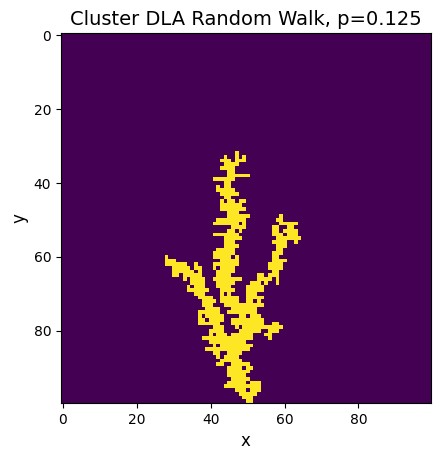

In [226]:
plt.imshow(MC_DLA_grid)
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Cluster DLA Random Walk, p=0.125',size=14)
plt.show()

In [194]:
ffff = []

In [195]:
len(ffff)

0